In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import math

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
# Data candidates
df_candidates = pd.read_excel("Candidates_Results.xlsx").iloc[:]
df_persons = df_candidates.astype('int').set_index('No')
df_persons


,Language Test,Professional Test,Safety Rule Test,Professional Skills,Computer Skills
No,,,,,
1,80,70,87,77,76
2,85,65,76,80,75
3,78,90,72,80,85
4,75,84,69,85,65
5,84,67,60,75,85
6,85,78,82,81,79
7,77,83,74,70,71
8,78,82,72,80,78
9,85,90,80,88,90


In [3]:

#Interview
df_interview = pd.read_excel("Interview_Results.xlsx", header=1).set_index('No')
df_interview


,Panel Interview,1-on-1 Interview,Panel Interview.1,1-on-1 Interview.1,Panel Interview.2,1-on-1 Interview.2,Panel Interview.3,1-on-1 Interview.3
No,,,,,,,,
1,80,75,85,80,75,70,90,85
2,65,75,60,70,70,77,60,70
3,90,85,80,85,80,90,90,95
4,65,70,55,60,68,72,62,72
5,75,80,75,80,50,55,70,75
6,80,80,75,85,77,82,75,75
7,65,70,70,60,65,72,67,75
8,70,60,75,65,75,67,82,85
9,80,85,95,85,90,85,90,92


In [4]:
#Weights
df_weights_per_DM = pd.read_excel("Weights_Matrix.xlsx").iloc[:7].drop(['No'], axis = 1).set_index('Attributes')
df_weights_per_DM

,DM1,DM2,DM3,DM4
Attributes,,,,
Language Test,0.066,0.042,0.060,0.047
Professional Test,0.196,0.112,0.134,0.109
Safety Rule Test,0.066,0.082,0.051,0.037
Professional Skills,0.130,0.176,0.167,0.133
Computer Skills,0.130,0.118,0.100,0.081
Panel Interview,0.216,0.215,0.203,0.267
1-on-1 Interview,0.196,0.255,0.285,0.326


In [5]:
total_DMs = df_weights_per_DM.columns.size


In [6]:
decision_matrix = {}
for x in range(total_DMs):
    decision_matrix["DM"+str(x+1)] = df_persons.copy()
decision_matrix


{'DM1':     Language Test  Professional Test  Safety Rule Test  Professional Skills  \
 No                                                                            
 1              80                 70                87                   77   
 2              85                 65                76                   80   
 3              78                 90                72                   80   
 4              75                 84                69                   85   
 5              84                 67                60                   75   
 6              85                 78                82                   81   
 7              77                 83                74                   70   
 8              78                 82                72                   80   
 9              85                 90                80                   88   
 10             89                 75                79                   67   
 11             65               

In [7]:

for x in range(total_DMs):
    if x==0:
        decision_matrix["DM"+str(x+1)][['Panel Interview', '1-on-1 Interview']] = df_interview[['Panel Interview', '1-on-1 Interview']]
    else:
        decision_matrix["DM"+str(x+1)][['Panel Interview', '1-on-1 Interview']] = df_interview[['Panel Interview.'+str(x), '1-on-1 Interview.'+str(x)]]
decision_matrix

{'DM1':     Language Test  Professional Test  Safety Rule Test  Professional Skills  \
 No                                                                            
 1              80                 70                87                   77   
 2              85                 65                76                   80   
 3              78                 90                72                   80   
 4              75                 84                69                   85   
 5              84                 67                60                   75   
 6              85                 78                82                   81   
 7              77                 83                74                   70   
 8              78                 82                72                   80   
 9              85                 90                80                   88   
 10             89                 75                79                   67   
 11             65               

In [8]:
normalized_matrix = decision_matrix.copy()
for x in range(total_DMs):
    for idx, col in enumerate(decision_matrix["DM"+str(x+1)].columns):
        sum_of_squares = math.sqrt(float(decision_matrix["DM"+str(x+1)].pow(2).sum().get(idx)))
        for index, row in enumerate(decision_matrix["DM"+str(x+1)].index):
            curr_value = decision_matrix["DM"+str(x+1)].loc[row,col]
            normalized_value= curr_value/sum_of_squares
            normalized_matrix["DM"+str(x+1)].iloc[index, normalized_matrix["DM"+str(x+1)].columns.get_loc(col)] = normalized_value
normalized_matrix

{'DM1':     Language Test  Professional Test  Safety Rule Test  Professional Skills  \
 No                                                                            
 1        0.241998           0.218121          0.277039             0.243902   
 2        0.257123           0.202541          0.242011             0.253404   
 3        0.235948           0.280442          0.229274             0.253404   
 4        0.226873           0.261746          0.219721             0.269242   
 5        0.254098           0.208773          0.191061             0.237567   
 6        0.257123           0.243050          0.261117             0.256572   
 7        0.232923           0.258630          0.235643             0.221729   
 8        0.235948           0.255514          0.229274             0.253404   
 9        0.257123           0.280442          0.254749             0.278745   
 10       0.269223           0.233702          0.251564             0.212226   
 11       0.196623           0.17

In [9]:
positive_ideal_sol = {}
negative_ideal_sol = {}
for x in range(total_DMs):
    positive_ideal_sol["DM"+str(x+1)] = np.empty(normalized_matrix["DM"+str(x+1)].columns.size, dtype=float)
    negative_ideal_sol["DM"+str(x+1)] = np.empty(normalized_matrix["DM"+str(x+1)].columns.size, dtype=float) 
    for idx, col in enumerate(normalized_matrix["DM"+str(x+1)].columns):
        max_value = max(normalized_matrix["DM"+str(x+1)][col])
        min_value = min(normalized_matrix["DM"+str(x+1)][col])
        positive_ideal_sol["DM"+str(x+1)][idx] = max_value
        negative_ideal_sol["DM"+str(x+1)][idx] = min_value
print(positive_ideal_sol)
print(negative_ideal_sol)


{'DM1': array([0.28737257, 0.28044188, 0.28022352, 0.28508004, 0.28623979,
       0.2952407 , 0.30605378]), 'DM2': array([0.28737257, 0.28044188, 0.28022352, 0.28508004, 0.28623979,
       0.30699837, 0.28858756]), 'DM3': array([0.28737257, 0.28044188, 0.28022352, 0.28508004, 0.28623979,
       0.30627131, 0.29528996]), 'DM4': array([0.28737257, 0.28044188, 0.28022352, 0.28508004, 0.28623979,
       0.29879727, 0.29982033])}
{'DM1': array([0.18149847, 0.17138115, 0.19106149, 0.19638847, 0.19082653,
       0.16402261, 0.19329712]), 'DM2': array([0.18149847, 0.17138115, 0.19106149, 0.19638847, 0.19082653,
       0.1777359 , 0.19239171]), 'DM3': array([0.18149847, 0.17138115, 0.19106149, 0.19638847, 0.19082653,
       0.17015073, 0.18045497]), 'DM4': array([0.18149847, 0.17138115, 0.19106149, 0.19638847, 0.19082653,
       0.14939864, 0.15780017])}


In [10]:
#Euclidean distance p = 2 and Manhattan p = 1
euclidean_measure_pis = {}
manhattan_measure_pis = {}
euclidean_measure_nis = {}
manhattan_measure_nis = {}
for x in range(total_DMs):
    euclidean_measure_pis["DM"+str(x+1)] = np.empty(normalized_matrix["DM"+str(x+1)].index.size, dtype=float)
    manhattan_measure_pis["DM"+str(x+1)] = np.empty(normalized_matrix["DM"+str(x+1)].index.size, dtype=float)
    euclidean_measure_nis["DM"+str(x+1)] = np.empty(normalized_matrix["DM"+str(x+1)].index.size, dtype=float)
    manhattan_measure_nis["DM"+str(x+1)] = np.empty(normalized_matrix["DM"+str(x+1)].index.size, dtype=float)
    for index, row in enumerate(normalized_matrix["DM"+str(x+1)].index):
        temp_euclidean_pis = 0.0
        temp_euclidean_nis = 0.0
        temp_manhattan_pis = 0.0
        temp_manhattan_nis = 0.0
        temp_value = 0.0
        for idx, col in enumerate(normalized_matrix["DM"+str(x+1)].columns):
            curr_weight = df_weights_per_DM.loc[col,"DM"+str(x+1)]
            curr_pis = positive_ideal_sol["DM"+str(x+1)][idx]
            curr_nis = negative_ideal_sol["DM"+str(x+1)][idx]
            curr_value = normalized_matrix["DM"+str(x+1)].loc[row,col]
            # Euclidean
            temp_value = curr_weight*((curr_value-curr_pis) ** 2)
            temp_euclidean_pis = temp_euclidean_pis + temp_value
            temp_value = curr_weight*((curr_value-curr_nis) ** 2)
            temp_euclidean_nis = temp_euclidean_nis + temp_value
            # Manhattan
            temp_value = curr_weight*(curr_pis - curr_value)
            temp_manhattan_pis = temp_manhattan_pis + temp_value
            temp_value = curr_weight*(curr_value-curr_nis)
            temp_manhattan_nis = temp_manhattan_nis + temp_value
        euclidean_measure_pis["DM"+str(x+1)][index] = math.sqrt(temp_euclidean_pis)
        manhattan_measure_pis["DM"+str(x+1)][index] = temp_manhattan_pis
        euclidean_measure_nis["DM"+str(x+1)][index] = math.sqrt(temp_euclidean_nis)
        manhattan_measure_nis["DM"+str(x+1)][index] = temp_manhattan_nis
print(manhattan_measure_nis)

{'DM1': array([0.06234954, 0.04817546, 0.08936914, 0.05107901, 0.05815323,
       0.07322755, 0.04822242, 0.05163153, 0.09072379, 0.05472859,
       0.00681416, 0.02002229, 0.06103162, 0.06657839, 0.04282529,
       0.1029054 , 0.0742369 ]), 'DM2': array([0.06638995, 0.03815882, 0.07486348, 0.02907535, 0.05411579,
       0.06900787, 0.03459724, 0.04961725, 0.09459992, 0.05504196,
       0.01542893, 0.02660232, 0.06050597, 0.05808139, 0.04386107,
       0.09707572, 0.05134362]), 'DM3': array([0.05859804, 0.05999181, 0.09075505, 0.05838082, 0.02419439,
       0.0777066 , 0.05103938, 0.06022735, 0.10137952, 0.05869326,
       0.02164612, 0.01264729, 0.05753622, 0.06756271, 0.04451701,
       0.09319976, 0.07002431]), 'DM4': array([0.09745991, 0.05415694, 0.11607213, 0.06172457, 0.06728725,
       0.07917178, 0.06500353, 0.09417163, 0.11958171, 0.05794624,
       0.04253538, 0.00633152, 0.07058054, 0.07848941, 0.04463835,
       0.11554518, 0.07126552])}


In [11]:
eucl_pis_arithmetic = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
eucl_pis_geometric = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
manhattan_pis_arithmetic = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
manhattan_pis_geometric = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
eucl_nis_arithmetic = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
eucl_nis_geometric = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
manhattan_nis_arithmetic = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
manhattan_nis_geometric = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
for index, row in enumerate(normalized_matrix["DM1"].index):
    temp_pow = 1 / total_DMs
    #Arithmetic mean
    #PIS
    temp_value = 0
    for x in range(total_DMs):
        temp_value = temp_value + euclidean_measure_pis["DM" + str(x+1)][index]
    eucl_pis_arithmetic[index] = temp_value / total_DMs
    temp_value = 0
    
    for x in range(total_DMs):
        temp_value = temp_value + manhattan_measure_pis["DM" + str(x+1)][index]
    manhattan_pis_arithmetic[index] = temp_value / total_DMs
    #NIS
    temp_value = 0
    for x in range(total_DMs):
        temp_value = temp_value + euclidean_measure_nis["DM" + str(x+1)][index]
    eucl_nis_arithmetic[index] = temp_value / total_DMs
    temp_value = 0
    
    for x in range(total_DMs):
        temp_value = temp_value + manhattan_measure_nis["DM" + str(x+1)][index]
    manhattan_nis_arithmetic[index] = temp_value / total_DMs
    
    #Geometric mean
    #PIS
    temp_value = 1
    for x in range(total_DMs):
        temp_value = temp_value * euclidean_measure_pis["DM" + str(x+1)][index]
    eucl_pis_geometric[index] = temp_value ** temp_pow
    temp_value = 1
    for x in range(total_DMs):
        temp_value = temp_value * manhattan_measure_pis["DM" + str(x+1)][index]
    manhattan_pis_geometric[index] = temp_value ** temp_pow
    #NIS
    temp_value = 1
    for x in range(total_DMs):
        temp_value = temp_value * euclidean_measure_nis["DM" + str(x+1)][index]
    eucl_nis_geometric[index] = temp_value ** temp_pow
    temp_value = 1
    for x in range(total_DMs):
        temp_value = temp_value * manhattan_measure_nis["DM" + str(x+1)][index]
    manhattan_nis_geometric[index] = temp_value ** temp_pow



In [14]:
rel_close_eucl_arithmetic = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
rel_close_eucl_geometric = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
rel_close_manh_arithmetic = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
rel_close_manh_geometric = np.empty(normalized_matrix["DM1"].index.size, dtype=float)
for index, row in enumerate(normalized_matrix["DM1"].index):
    rel_close_eucl_arithmetic[index] = eucl_nis_arithmetic[index] / (eucl_nis_arithmetic[index] + eucl_pis_arithmetic[index])
    rel_close_eucl_geometric[index] = eucl_nis_geometric[index] / (eucl_nis_geometric[index] + eucl_pis_geometric[index])
    rel_close_manh_arithmetic[index] = manhattan_nis_arithmetic[index] / (manhattan_nis_arithmetic[index] + manhattan_pis_arithmetic[index])
    rel_close_manh_geometric[index] = manhattan_nis_geometric[index] / (manhattan_nis_geometric[index] + manhattan_pis_geometric[index])
rel_close_manh_geometric


array([0.63691856, 0.44626934, 0.83611759, 0.43939834, 0.44459387,
       0.66979946, 0.43833613, 0.56830759, 0.91310074, 0.50755191,
       0.1636982 , 0.13222326, 0.5578831 , 0.60332205, 0.3941707 ,
       0.92007993, 0.59757188])

In [15]:
# Ranks Euclidean-Arithmetic
array1 = rel_close_eucl_arithmetic.copy()
temp = (-array1).argsort()
ranks_eucl_arithmetic = np.arange(len(array1))[temp.argsort()] + 1
print(ranks_eucl_arithmetic)

# Ranks Euclidean-Geometric
array2 = rel_close_eucl_geometric.copy()
temp = (-array2).argsort()
ranks_eucl_geometric = np.arange(len(array2))[temp.argsort()] + 1
print(ranks_eucl_geometric)

# Ranks Manhattan-Arithmetic
array3 = rel_close_manh_arithmetic.copy()
temp = (-array3).argsort()
ranks_manh_arithmetic = np.arange(len(array3))[temp.argsort()] + 1
print(ranks_manh_arithmetic)

# Ranks Manhattan-Geometric
array4 = rel_close_manh_geometric.copy()
temp = (-array4).argsort()
ranks_manh_geometric = np.arange(len(array4))[temp.argsort()] + 1
print(ranks_manh_geometric)


[ 5 14  3 13 11  4 12  8  2 10 16 17  9  6 15  1  7]
[ 5 14  3 12 11  4 13  8  2 10 16 17  9  6 15  1  7]
[ 5 12  3 13 11  4 14  8  2 10 16 17  9  6 15  1  7]
[ 5 11  3 13 12  4 14  8  2 10 16 17  9  6 15  1  7]


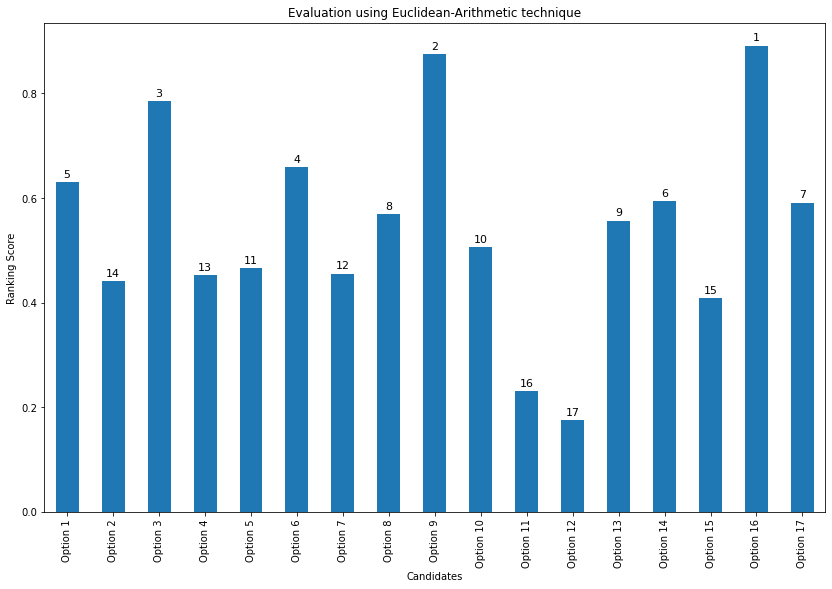

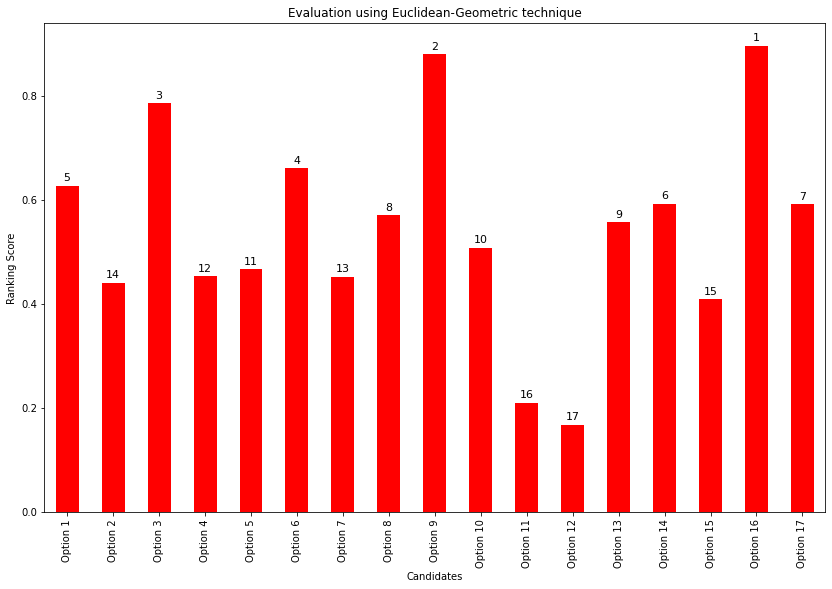

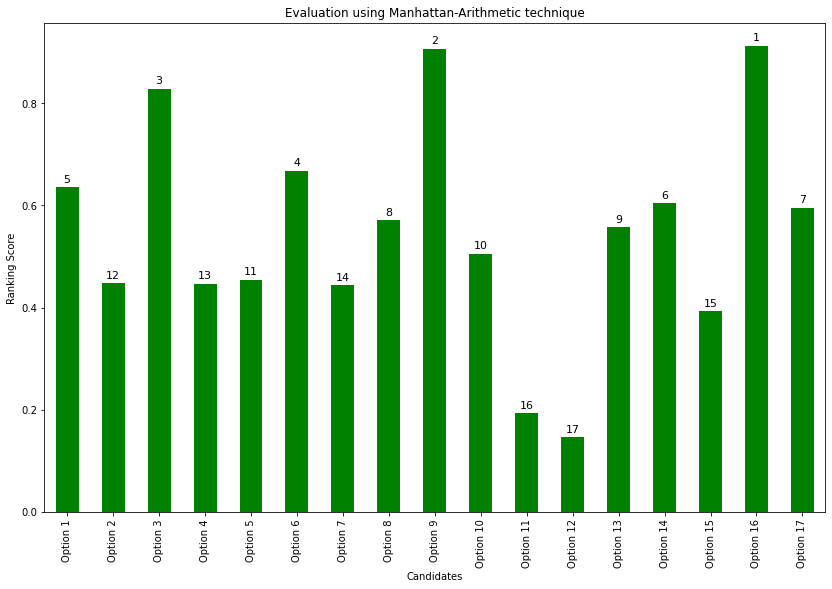

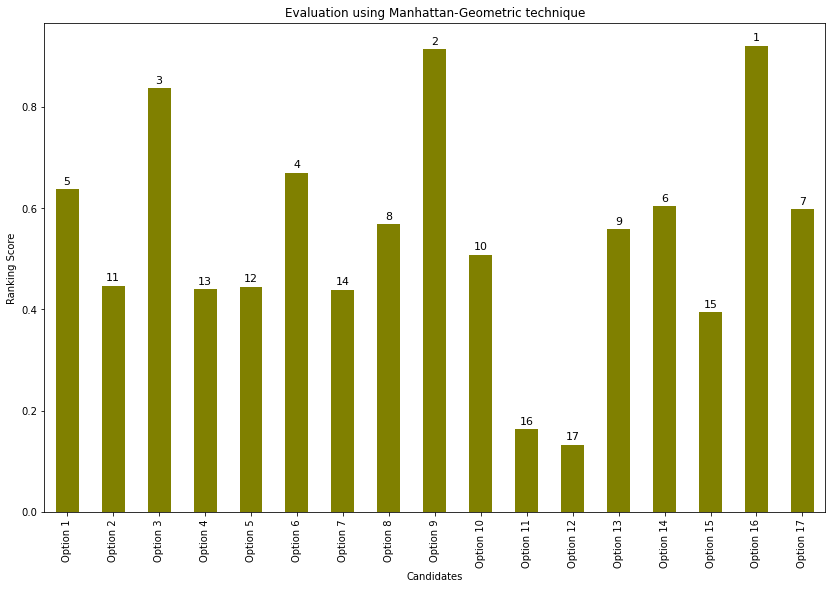

In [19]:
x_axis = ["Option " + str(x + 1) for x in range(normalized_matrix["DM1"].index.size)]

data = pd.DataFrame(rel_close_eucl_arithmetic, index=x_axis)
plots = data.plot(kind='bar', figsize=(14, 9), xlabel='Candidates', ylabel='Ranking Score',
                          title="Evaluation using Euclidean-Arithmetic technique")
for index, bar in enumerate(plots.patches):
    plots.annotate(ranks_eucl_arithmetic[index],
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points')
plt.legend().remove()
plt.savefig("Evaluation-Euclidean-Arithmetic.svg")
plt.show()

data = pd.DataFrame(rel_close_eucl_geometric, index=x_axis)
plots = data.plot(kind='bar', figsize=(14, 9), color='red', xlabel='Candidates', ylabel='Ranking Score',
                     title="Evaluation using Euclidean-Geometric technique")
for index, bar in enumerate(plots.patches):
    plots.annotate(ranks_eucl_geometric[index],
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points')
plt.legend().remove()
plt.savefig("Evaluation-Euclidean-Geometric.svg")
plt.show()

data = pd.DataFrame(rel_close_manh_arithmetic, index=x_axis)
plots = data.plot(kind='bar', figsize=(14, 9), color='green', xlabel='Candidates', ylabel='Ranking Score',
                    title="Evaluation using Manhattan-Arithmetic technique")
for index, bar in enumerate(plots.patches):
    plots.annotate(ranks_manh_arithmetic[index],
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=11, xytext=(0, 8),
                     textcoords='offset points')
plt.legend().remove()
plt.savefig("Evaluation-Manhattan-Arithmetic.svg")
plt.show()

data = pd.DataFrame(rel_close_manh_geometric, index=x_axis)
plots = data.plot(kind='bar', figsize=(14, 9), color='olive', xlabel='Candidates', ylabel='Ranking Score',
                    title="Evaluation using Manhattan-Geometric technique")
for index, bar in enumerate(plots.patches):
    plots.annotate(ranks_manh_geometric[index],
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=11, xytext=(0, 8),
                    textcoords='offset points')
plt.legend().remove()
plt.savefig("Evaluation-Manhattan-Geometric.svg")
plt.show()